In [2]:
# Importing Libraries
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
infected = os.listdir('../IBM/cell_images/cell_images/Parasitized/')
uninfected = os.listdir('../IBM/cell_images/cell_images/Uninfected/')

In [4]:
data = []
labels = []

for i in infected:
    try:
        image = cv2.imread("../IBM/cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50, 50))
        data.append(np.array(resize_img))
        labels.append(1)
    except AttributeError:
        print('')

for u in uninfected:
    try:
        image = cv2.imread("../IBM/cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50, 50))
        data.append(np.array(resize_img))
        labels.append(0)
    except AttributeError:
        print('')

KeyboardInterrupt: 

In [ ]:
cells = np.array(data)
labels = np.array(labels)

cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells / 255

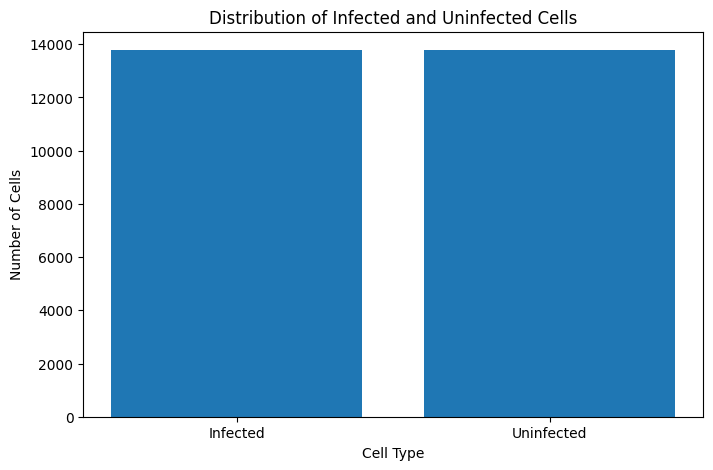

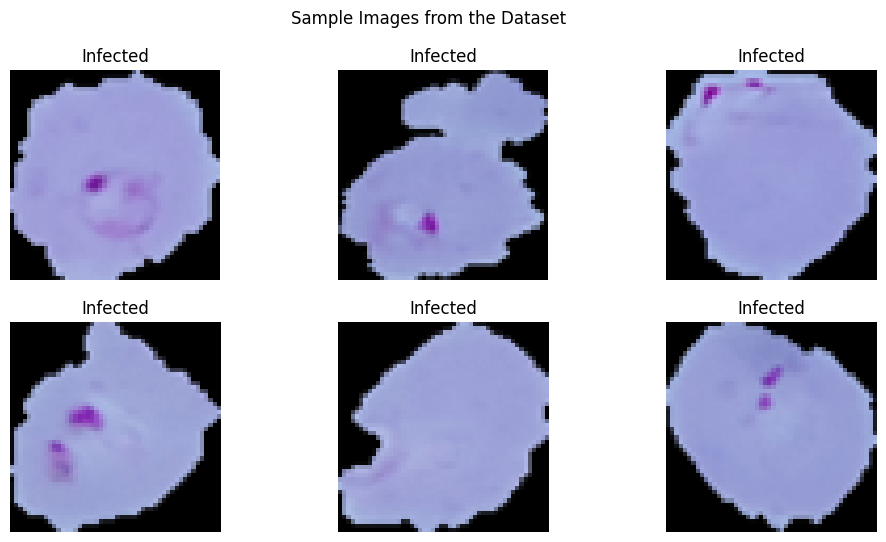

In [ ]:
infected_count = np.sum(labels == 1)
uninfected_count = np.sum(labels == 0)

# Plot the distribution of infected and uninfected cells
plt.figure(figsize=(8, 5))
plt.bar(['Infected', 'Uninfected'], [infected_count, uninfected_count])
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.title('Distribution of Infected and Uninfected Cells')
plt.show()

# Plot some sample images from both classes
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cells[i])
    plt.title('Infected' if labels[i] == 1 else 'Uninfected')
    plt.axis('off')
plt.suptitle('Sample Images from the Dataset')
plt.show()

In [ ]:
train_x, x, train_y, y = train_test_split(cells, labels, test_size=0.2, random_state=111)
eval_x, test_x, eval_y, test_y = train_test_split(x, y, test_size=0.5, random_state=111)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=50, kernel_size=[7, 7], padding="same", activation=tf.nn.relu, input_shape=(50, 50, 3)),
    tf.keras.layers.Conv2D(filters=90, kernel_size=[3, 3], padding="valid", activation=tf.nn.relu),
    tf.keras.layers.Conv2D(filters=10, kernel_size=[5, 5], padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),
    tf.keras.layers.Conv2D(filters=5, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2000, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1000, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=500, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./model_checkpoints/model_checkpoint_{epoch:02d}.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

In [ ]:
# # Train the model using the Keras-based fit method with checkpoint callback
# num_epochs = 10
# batch_size = 100

# model.fit(train_x, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(eval_x, eval_y),
#           callbacks=[checkpoint_callback])

# # Model will be saved at the given path
# model.save('/tmp/final_model')

In [ ]:
# Once the model is trained we can retrieve by using the load_model function so we don't have to tarin again and again from scratch
model = tf.keras.models.load_model('/tmp/final_model/')

In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(test_x, test_y)
print(test_results)

87/87 [==============================] - 10s 100ms/step - loss: 0.2286 - accuracy: 0.9507
[0.22862832248210907, 0.9506531357765198]


In [ ]:
# Make predictions on the test set
y_pred = model.predict(test_x)
classes = np.argmax(y_pred, axis=1)

87/87 [==============================] - 9s 103ms/step


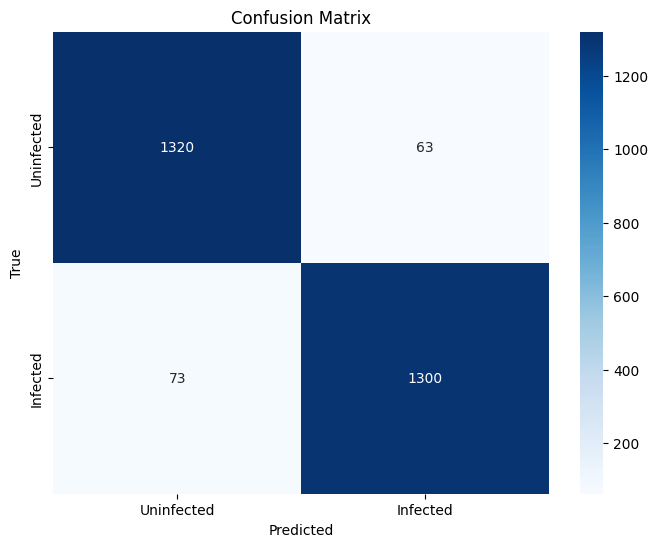

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_y, classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Infected'],
            yticklabels=['Uninfected', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print('{} \n{} \n{}'.format(confusion_matrix(test_y, classes),
                            classification_report(test_y, classes),
                            accuracy_score(test_y, classes)))

[[1320   63]
 [  73 1300]] 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1383
           1       0.95      0.95      0.95      1373

    accuracy                           0.95      2756
   macro avg       0.95      0.95      0.95      2756
weighted avg       0.95      0.95      0.95      2756
 
0.9506531204644412


In [ ]:
eval_results = model.evaluate(eval_x, eval_y)
print(eval_results)

87/87 [==============================] - 9s 104ms/step - loss: 0.2158 - accuracy: 0.9488
[0.21581882238388062, 0.9488388895988464]


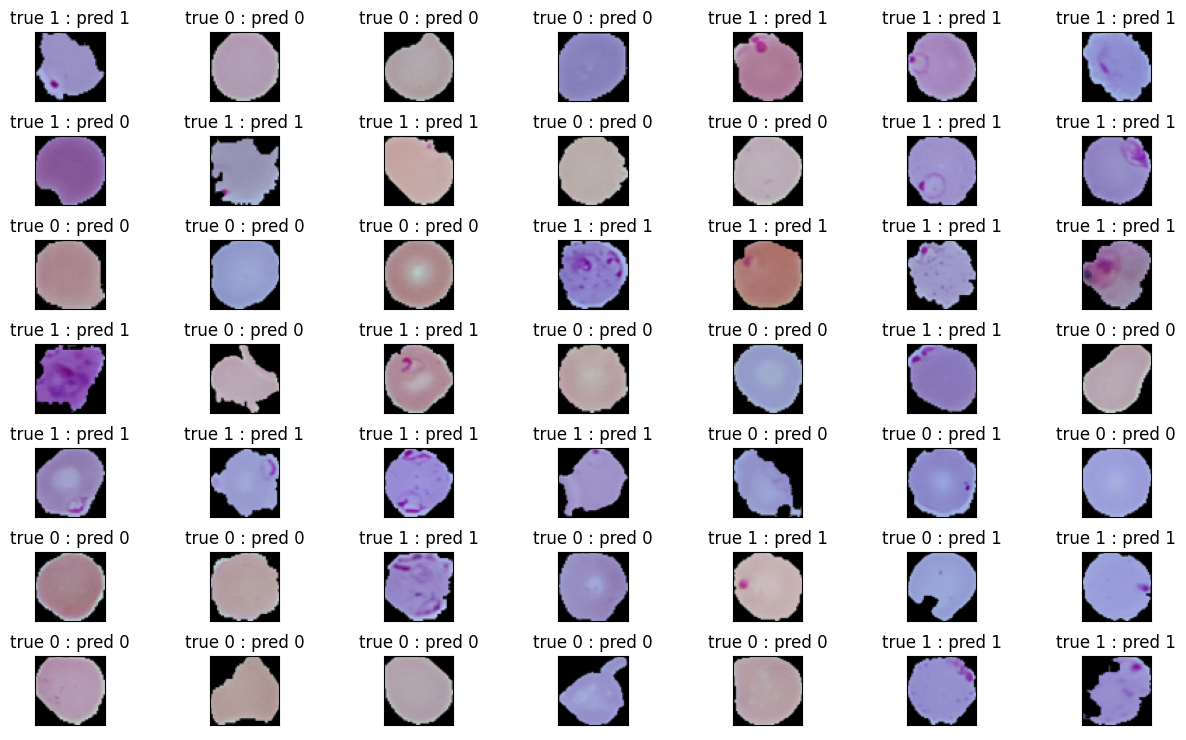

In [ ]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('true {} : pred {}'.format(test_y[r[0]] , classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

# Testing the model for a new image
##### We have given a image of infected cell let's see whether it will detect or not

In [ ]:
model = tf.keras.models.load_model('/tmp/final_model')

image = cv2.imread('../IBM/sample.png')
new_image = Image.fromarray(image , 'RGB')
resized_image = new_image.resize((50, 50))
processed_image = np.array(resized_image) / 255.0

predictions = model.predict(np.array([processed_image]))
classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 267ms/step


(([], []), ([], []))

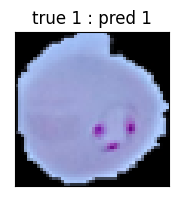

In [ ]:
plt.figure(1 , figsize = (4 , 2))
plt.imshow(processed_image)
plt.title('true {} : pred {}'.format(1 , classes[0]) )
plt.xticks([]) , plt.yticks([])